In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Abalone CS DS")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
pd.get_dummies(df['Sex'])

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [7]:
dummies = pd.get_dummies(df['Sex'])
df = pd.concat([df, dummies], axis=1)

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [9]:
df = df.drop('Sex', axis=1)

In [10]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


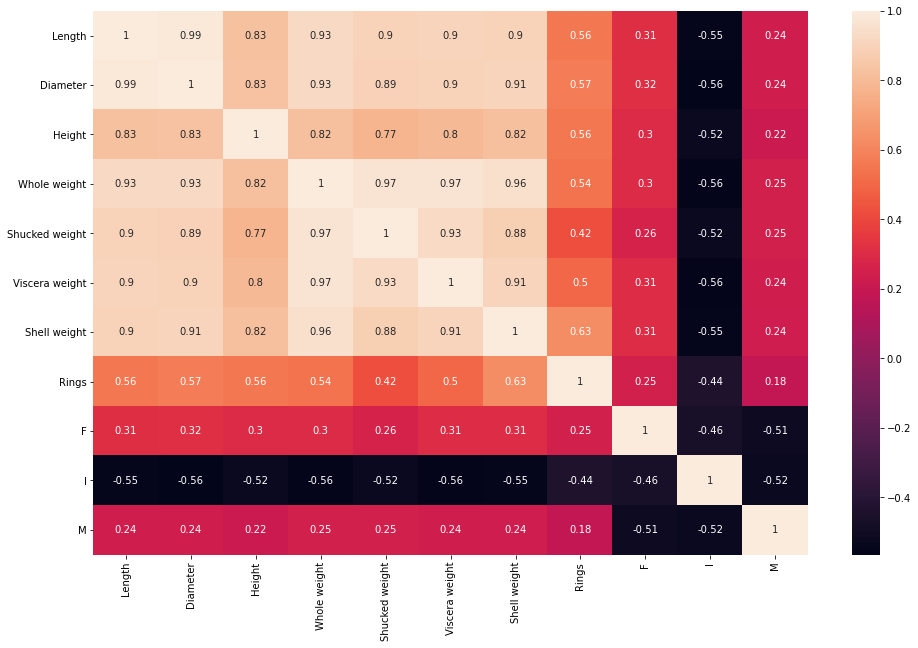

In [11]:
plt.figure(figsize= (16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

The correlation of all the columns are good with the target column. So skewness need not be removed or reduced.

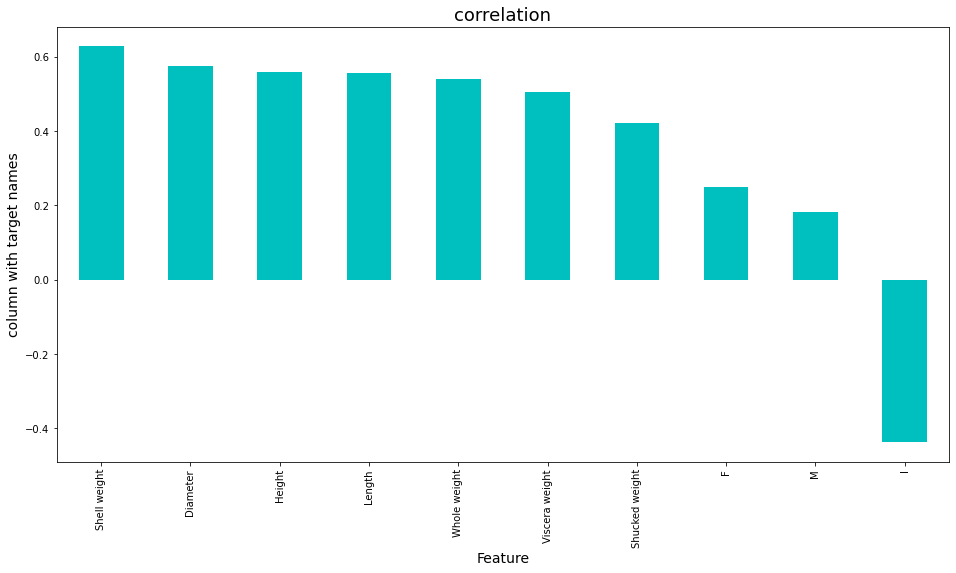

In [12]:
plt.figure(figsize=(16,8))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

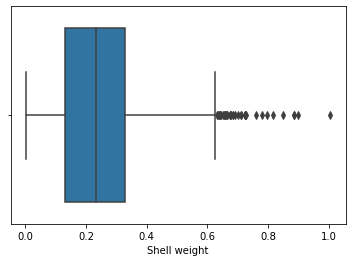

In [13]:
sns.boxplot(df['Shell weight']);

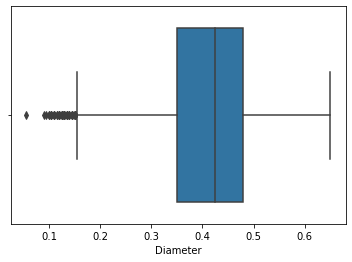

In [14]:
sns.boxplot(df['Diameter']);

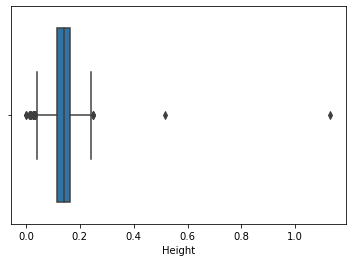

In [15]:
sns.boxplot(df['Height']);

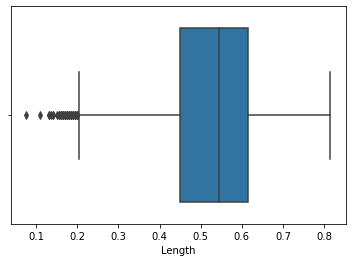

In [16]:
sns.boxplot(df['Length']);

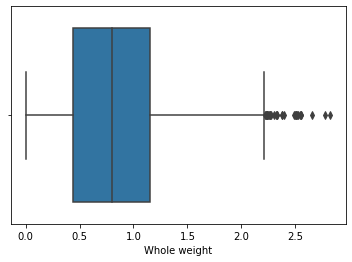

In [17]:
sns.boxplot(df['Whole weight']);

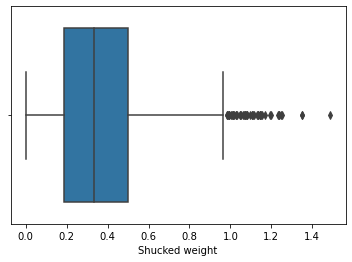

In [18]:
sns.boxplot(df['Shucked weight']);

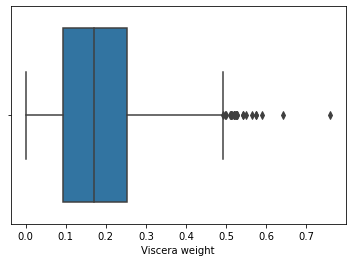

In [19]:
sns.boxplot(df['Viscera weight']);

In [20]:
y = df['Rings']
x = df.drop(columns = ['Rings'])

In [21]:
z = np.abs(zscore(x))
threshold = 3
df_new = x[(z<3).all(axis=1)]

In [22]:
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", df_new.shape)
print("percentage loss".ljust(20),":", (x.shape[0]-df_new.shape[0])/x.shape[0])

shape before and after
shape before         : (4177, 10)
shape after          : (4084, 10)
percentage loss      : 0.022264783337323436


Percentage loss is very low, which is good.

In [23]:
from scipy.stats import skew

Length
-0.6335530357553206


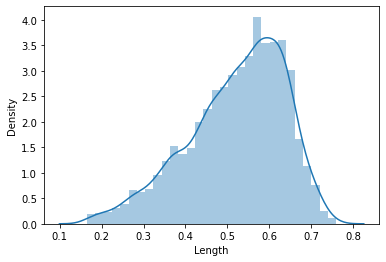

Diameter
-0.6052273525549002


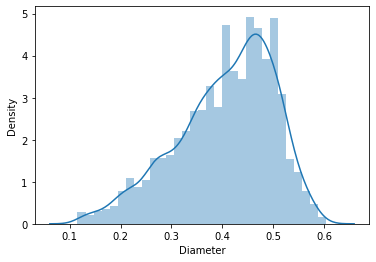

Height
-0.2471012361244269


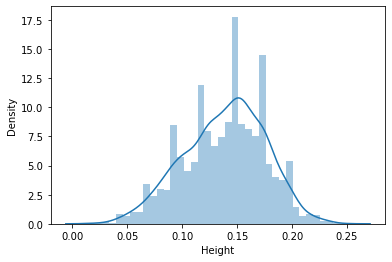

Whole weight
0.3237669742768693


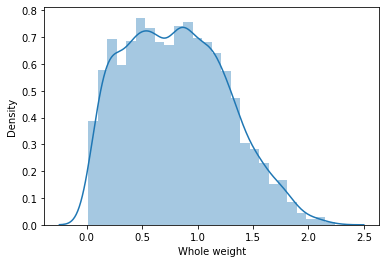

Shucked weight
0.4494083197077053


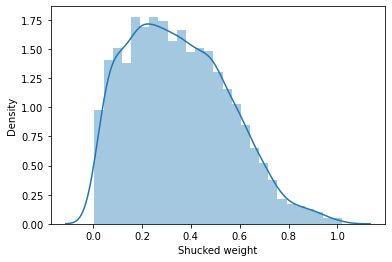

Viscera weight
0.42977456978835943


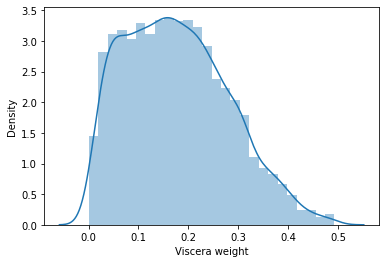

Shell weight
0.35838000704463574


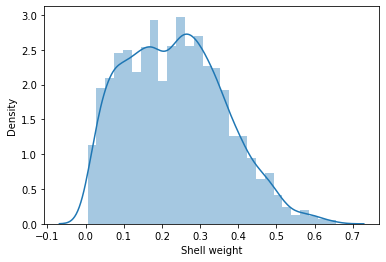

F
0.8081179916837353


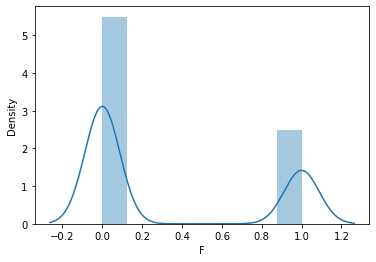

I
0.7500070780028053


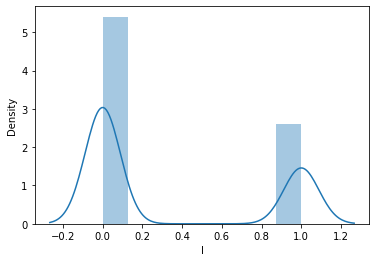

M
0.5703484619581237


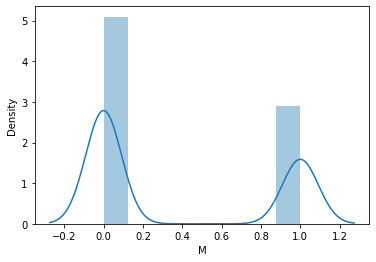

In [24]:
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()
    

In [25]:
df_new.skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
F                 0.808415
I                 0.750283
M                 0.570558
dtype: float64

Though length and diameter are skewed. Not removing the skewness as those have a good posetive correlation with the target column

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
        -0.68801788,  1.31667716]])

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = pd.DataFrame()
vif['vif']= [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,40.945763,Length
1,42.379841,Diameter
2,3.581369,Height
3,109.768710,Whole weight
4,28.550546,Shucked weight
5,17.445012,Viscera weight
6,21.263272,Shell weight
7,inf,F
8,inf,I
9,inf,M


In [30]:
best_features=SelectKBest(score_func = f_classif,k=9)
fit = best_features.fit(x,y)
df_new_scores = pd.DataFrame(fit.scores_)
df_new_columns = pd.DataFrame(x.columns)

In [31]:
feature_scores = pd.concat([df_new_columns,df_new_scores], axis = 1)
feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(9,'Score'))

     Feature_Name       Score
1        Diameter  196.436105
0          Length  188.509425
6    Shell weight  147.236946
2          Height  124.427714
3    Whole weight  113.712340
5  Viscera weight  103.721438
4  Shucked weight   80.797677
8               I   68.870477
7               F   15.783520


In [32]:
df_new.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'F', 'I', 'M'],
      dtype='object')

In [33]:
df_new.drop(["Height", "Whole weight"],inplace= True, axis=1)

Dropped both height and whole weight as the columns are they were highly correlated to length and viscera weight respectively which could cause overfitting issue.

In [34]:
from sklearn.metrics import r2_score

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.25,random_state = 345)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
log_reg = LinearRegression()

log_reg.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = log_reg.predict(x_test)

In [39]:
print(r2_score(y_test,y_pred))

0.46028764943833467


In [40]:
from sklearn.linear_model import Lasso,LassoCV
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [41]:
alpha = lasscv.alpha_

In [42]:
alpha

4.575558526576199e-05

In [43]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=4.575558526576199e-05)

In [44]:
lasso_reg.score(x_test,y_test)

0.4602856573684688

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [47]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.4602560701300925

In [48]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean

In [49]:
cv_mean()

0.42177145562620566

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'], 'max_features': ["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [57]:
rf= RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore =  cross_val_score(rf,x,y,cv=5)
rfc=  rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 53.62291064747049
Cross Val Score: 46.19283491179219


In [58]:
from sklearn.tree import DecisionTreeRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30,random_state = i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is:', maxAccu,'on Random_state' ,maxRS)

Best Accuracy is: 0.24820273929819792 on Random_state 110


In [60]:
import pickle
filename = 'abalone.pkl'
pickle.dump(rf, open(filename, 'wb'))

Since, RandomForestRegressor is giving better accuracy, as compared to other models. so considering to save the same